In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Полиноминальная регрессия

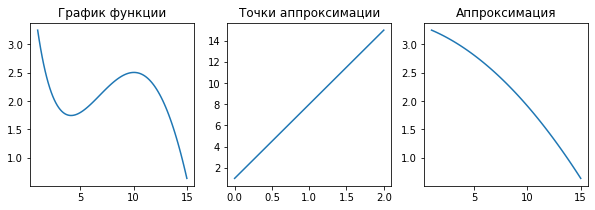

In [32]:
n = 3
xpoints = np.linspace(1, 15, n)
A = np.array([[x**i for i in range(n)] for x in xpoints])
b = np.array([np.sin(x/5.0)*np.exp(x/10.0)+5*np.exp(-0.5*x) for x in xpoints])
ans = np.linalg.solve(A, b)

def approx(x, par):
    s = 0
    for i in range(n):
        s += par[i] * x**i
    return s

OX = np.linspace(1, 15, 100)
OFunc = np.array([np.sin(x/5.0)*np.exp(x/10.0)+5*np.exp(-0.5*x) for x in OX])
OApprox = np.array([approx(x, ans) for x in OX])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(3)
fig.set_figwidth(10)
ax1.set_title("График функции")
ax1.plot(OX, OFunc)
ax2.set_title("Точки аппроксимации")
ax2.plot(xpoints)
ax3.set_title("Аппроксимация")
ax3.plot(OX, OApprox)

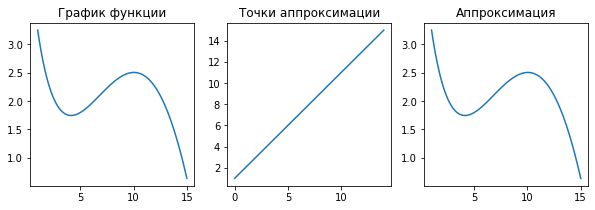

In [33]:
n = 15
xpoints = np.linspace(1, 15, n)
A = np.array([[x**i for i in range(n)] for x in xpoints])
b = np.array([np.sin(x/5.0)*np.exp(x/10.0)+5*np.exp(-0.5*x) for x in xpoints])
ans = np.linalg.solve(A, b)

def approx(x, par):
    s = 0
    for i in range(n):
        s += par[i] * x**i
    return s

OX = np.linspace(1, 15, 100)
OFunc = np.array([np.sin(x/5.0)*np.exp(x/10.0)+5*np.exp(-0.5*x) for x in OX])
OApprox = np.array([approx(x, ans) for x in OX])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(3)
fig.set_figwidth(10)
ax1.set_title("График функции")
ax1.plot(OX, OFunc)
ax2.set_title("Точки аппроксимации")
ax2.plot(xpoints)
ax3.set_title("Аппроксимация")
ax3.plot(OX, OApprox)

Полином достаточно хорошо аппроксимируется и при n = 5, поэтому я нарисовал n = 3, чтоб была видна красивая разница

## Полиноминальная регрессия с шумом

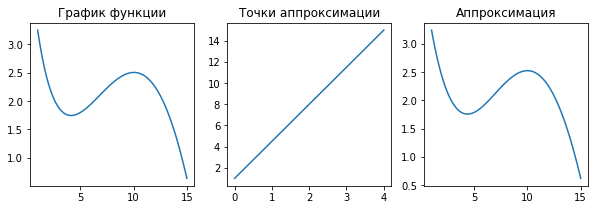

In [40]:
n = 5
xpoints = np.linspace(1, 15, n)
noise = np.random.normal(0, 0.01, n)
A = np.array([[x**i for i in range(n)] for x in xpoints])
b = np.array([np.sin(xpoints[i]/5.0)*np.exp(xpoints[i]/10.0)+5*np.exp(-0.5*xpoints[i]) + noise[i] for i in range(n)])
ans = np.linalg.solve(A, b)

def approx(x, par):
    s = 0
    for i in range(n):
        s += par[i] * x**i
    return s

OX = np.linspace(1, 15, 100)
OFunc = np.array([np.sin(x/5.0)*np.exp(x/10.0)+5*np.exp(-0.5*x) for x in OX])
OApprox = np.array([approx(x, ans) for x in OX])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(3)
fig.set_figwidth(10)
ax1.set_title("График функции")
ax1.plot(OX, OFunc)
ax2.set_title("Точки аппроксимации")
ax2.plot(xpoints)
ax3.set_title("Аппроксимация")
ax3.plot(OX, OApprox)

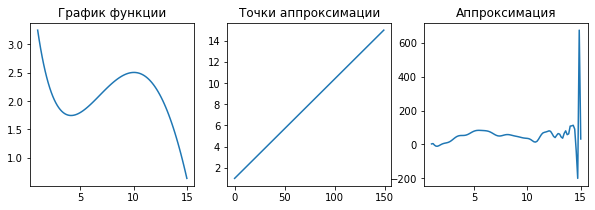

In [49]:
n = 150
xpoints = np.linspace(1, 15, n)
noise = np.random.normal(0, 1, n)
A = np.array([[x**i for i in range(n)] for x in xpoints])
b = np.array([np.sin(xpoints[i]/5.0)*np.exp(xpoints[i]/10.0)+5*np.exp(-0.5*xpoints[i]) + noise[i] for i in range(n)])
ans = np.linalg.solve(A, b)

def approx(x, par):
    s = 0
    for i in range(n):
        s += par[i] * x**i
    return s

OX = np.linspace(1, 15, 100)
OFunc = np.array([np.sin(x/5.0)*np.exp(x/10.0)+5*np.exp(-0.5*x) for x in OX])
OApprox = np.array([approx(x, ans) for x in OX])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(3)
fig.set_figwidth(10)
ax1.set_title("График функции")
ax1.plot(OX, OFunc)
ax2.set_title("Точки аппроксимации")
ax2.plot(xpoints)
ax3.set_title("Аппроксимация")
ax3.plot(OX, OApprox)

Даже при n = 5 шум не сильно мешает, поэтому я решил сделать шум помощнее, видим, что с отклонением 1 ничего не аппроксимируется, даже если взять очень большое n. Это естественно, у нас строится полином, который через другие точки проходит

## Метод наименьших квадратов

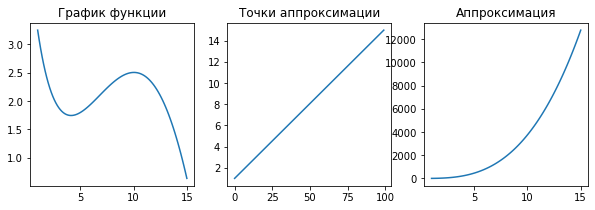

In [62]:
n = 100
xpoints = np.linspace(1, 15, n)
noise = np.random.normal(0, 0.01, n)
A = np.vstack([xpoints**3, xpoints**2, xpoints**1, xpoints**0]).transpose()
b = np.array([np.sin(xpoints[i]/5.0)*np.exp(xpoints[i]/10.0)+5*np.exp(-0.5*xpoints[i]) + noise[i] for i in range(n)])
ans = np.linalg.lstsq(A, b, rcond=None)[0]
#print(ans)
#print(A)

def approx(x, par):
    s = 0
    for i in range(4):
        s += par[i] * x**i
    return s

OX = np.linspace(1, 15, 100)
OFunc = np.array([np.sin(x/5.0)*np.exp(x/10.0)+5*np.exp(-0.5*x) for x in OX])
OApprox = np.array([approx(x, ans) for x in OX])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(3)
fig.set_figwidth(10)
ax1.set_title("График функции")
ax1.plot(OX, OFunc)
ax2.set_title("Точки аппроксимации")
ax2.plot(xpoints)
ax3.set_title("Аппроксимация")
ax3.plot(OX, OApprox)

Вывод: метод наименьших квадратов почему-то плохо аппроксимирует функцию

## Большой вывод

Мы научились аппроксимировать функции и очень этому рады